<a href="https://colab.research.google.com/github/isacprogram/aprendizado-data/blob/main/mod06_graficos_sinasc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos de frequência em Python

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# % matplotlib notebook

In [3]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')

<ipython-input-3-2c8114cd6380>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sinasc = pd.read_csv('SINASC_RO_2019.csv')


In [4]:
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5.0,2.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5.0,3.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4.0,4.0,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5.0,5.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,1,2516500.0,110001,1,29,2.0,8 a 11 anos,999992,1.0,0.0,...,3.0,1480316.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
13784,1,2516500.0,110001,1,39,2.0,1 a 3 anos,621005,3.0,0.0,...,5.0,1480317.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
13785,1,2516500.0,110001,1,29,2.0,12 anos ou mais,NaN,0.0,0.0,...,5.0,1480318.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
13786,1,2516500.0,110001,1,17,2.0,4 a 7 anos,621005,0.0,0.0,...,5.0,1480319.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [5]:
# extraindo as variáveis de interesse
df = sinasc[['APGAR1','APGAR5','SEXO','GESTACAO','ESTCIVMAE','CONSULTAS']]
df

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4.0
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4.0
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4.0
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3.0
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4.0
...,...,...,...,...,...,...
13783,9.0,10.0,Feminino,42 semanas e mais,2.0,3.0
13784,9.0,10.0,Masculino,37 a 41 semanas,2.0,4.0
13785,9.0,10.0,Masculino,37 a 41 semanas,2.0,4.0
13786,9.0,10.0,Masculino,37 a 41 semanas,2.0,4.0


In [6]:
#verificando dados faltantes e tratando
print(df.isna().sum())
df_g = df.dropna()

APGAR1        45
APGAR5        51
SEXO           4
GESTACAO     643
ESTCIVMAE    151
CONSULTAS      1
dtype: int64


In [7]:
#verificando se há algum dado faltante
df_g.isna().sum()

APGAR1       0
APGAR5       0
SEXO         0
GESTACAO     0
ESTCIVMAE    0
CONSULTAS    0
dtype: int64

<Axes: xlabel='CONSULTAS', ylabel='count'>

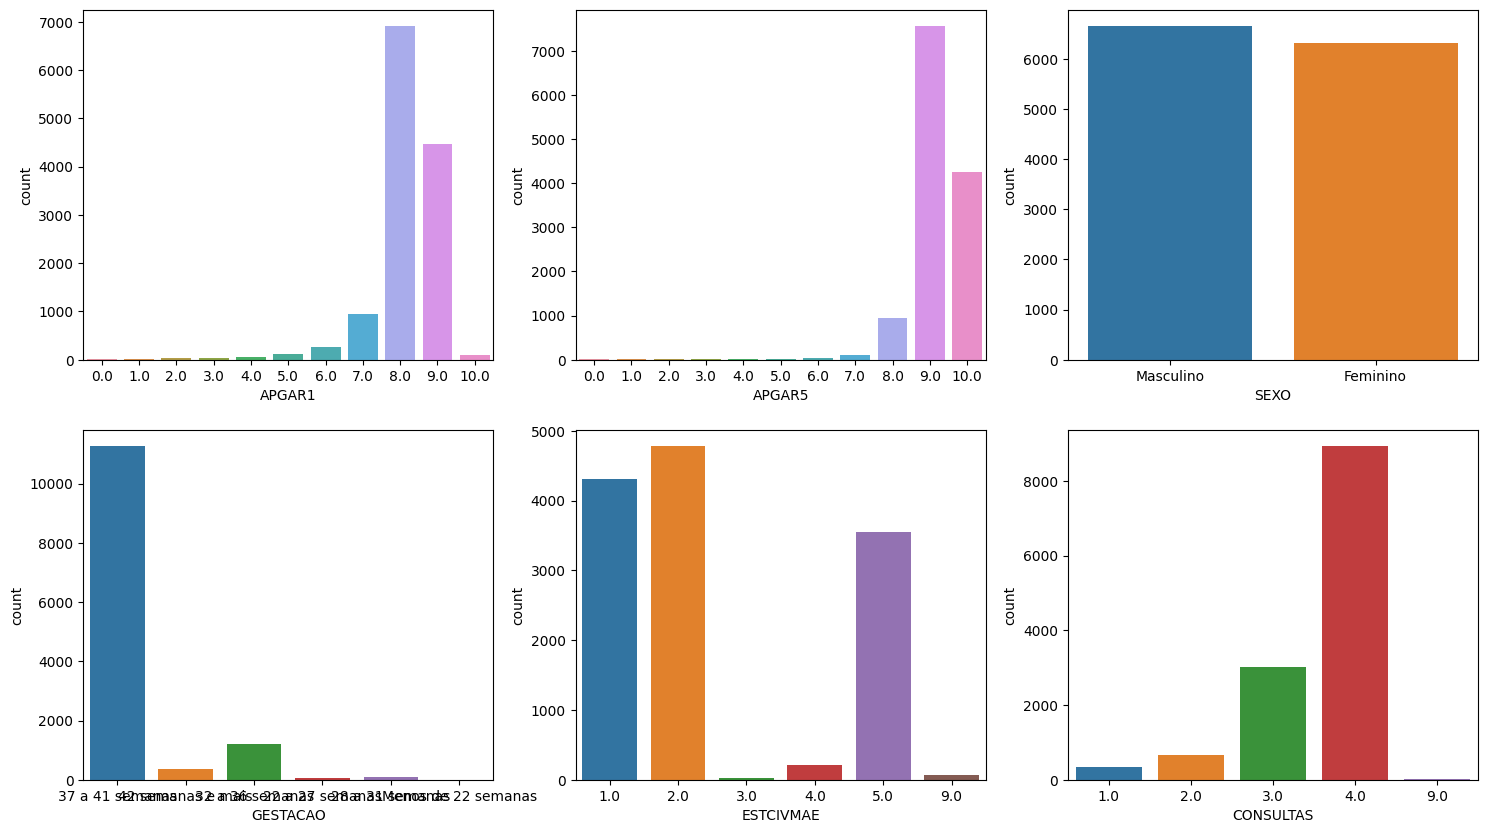

In [8]:
#plotando primeiros 6 graficos como distribuição de fequência
plt.rc('figure', figsize=(18,10))
fig, axis = plt.subplots(2,3)
sns.countplot(ax = axis[0, 0], x= 'APGAR1', data=df_g)
sns.countplot(ax = axis[0, 1], x= 'APGAR5', data=df_g)
sns.countplot(ax = axis[0, 2], x= 'SEXO', data=df_g)
sns.countplot(ax = axis[1, 0], x= 'GESTACAO', data=df_g)
sns.countplot(ax = axis[1, 1], x= 'ESTCIVMAE', data=df_g)
sns.countplot(ax = axis[1, 2], x= 'CONSULTAS', data=df_g)


In [9]:
plt.close('all')

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='CONSULTAS', ylabel='APGAR5'>

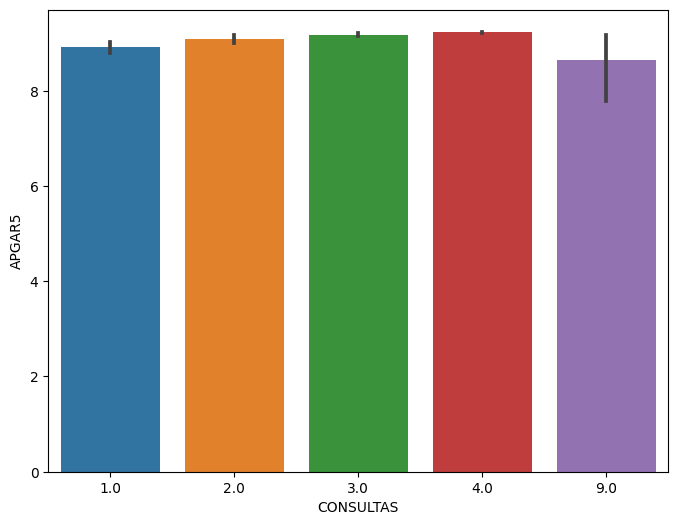

In [10]:
# gráfico para observação da média do score apgar, levando em consideração o (n)de consultas
plt.rc('figure',figsize=(8,6))
fig, axes = plt.subplots()

sns.barplot(ax = axes ,x = 'CONSULTAS', y = 'APGAR5', estimator='mean',data= df_g)

In [11]:
plt.close('all')

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<Axes: xlabel='CONSULTAS', ylabel='count'>

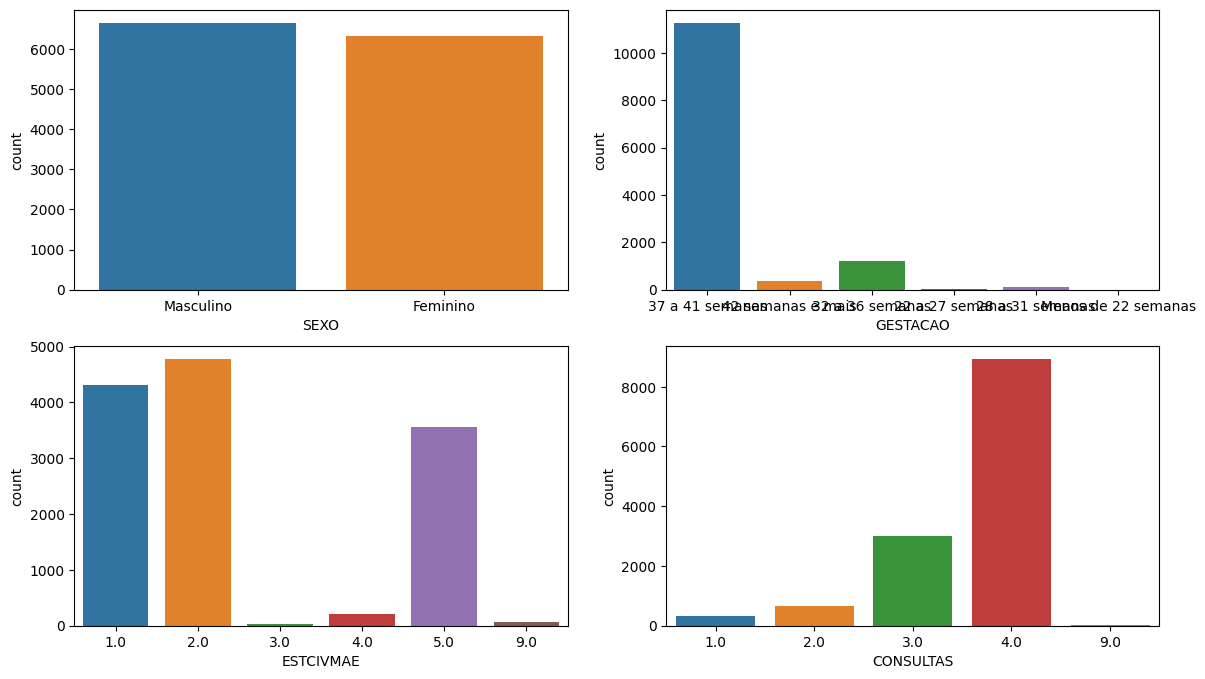

In [12]:
# verificando as frequências das variáveis especificadas.
plt.rc('figure', figsize=(14,8))
fig, axe = plt.subplots(2,2)

sns.countplot(ax = axe[0,0], x= 'SEXO',data=df_g)
sns.countplot(ax = axe[0,1], x= 'GESTACAO',data=df_g)
sns.countplot(ax = axe[1,0], x= 'ESTCIVMAE',data=df_g)
sns.countplot(ax = axe[1,1], x= 'CONSULTAS',data=df_g)

In [13]:
plt.close('all')